# Module import

In [36]:
import pandas as pd
import pyscreenshot as ImageGrab
from PIL import Image
import pytesseract
pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import matplotlib.pyplot as plt
from pynput.mouse import Button, Controller
import pyautogui
import time as tlib
from datetime import *
import numpy as np
mouse = Controller()

# Screen shots / look for coordinates

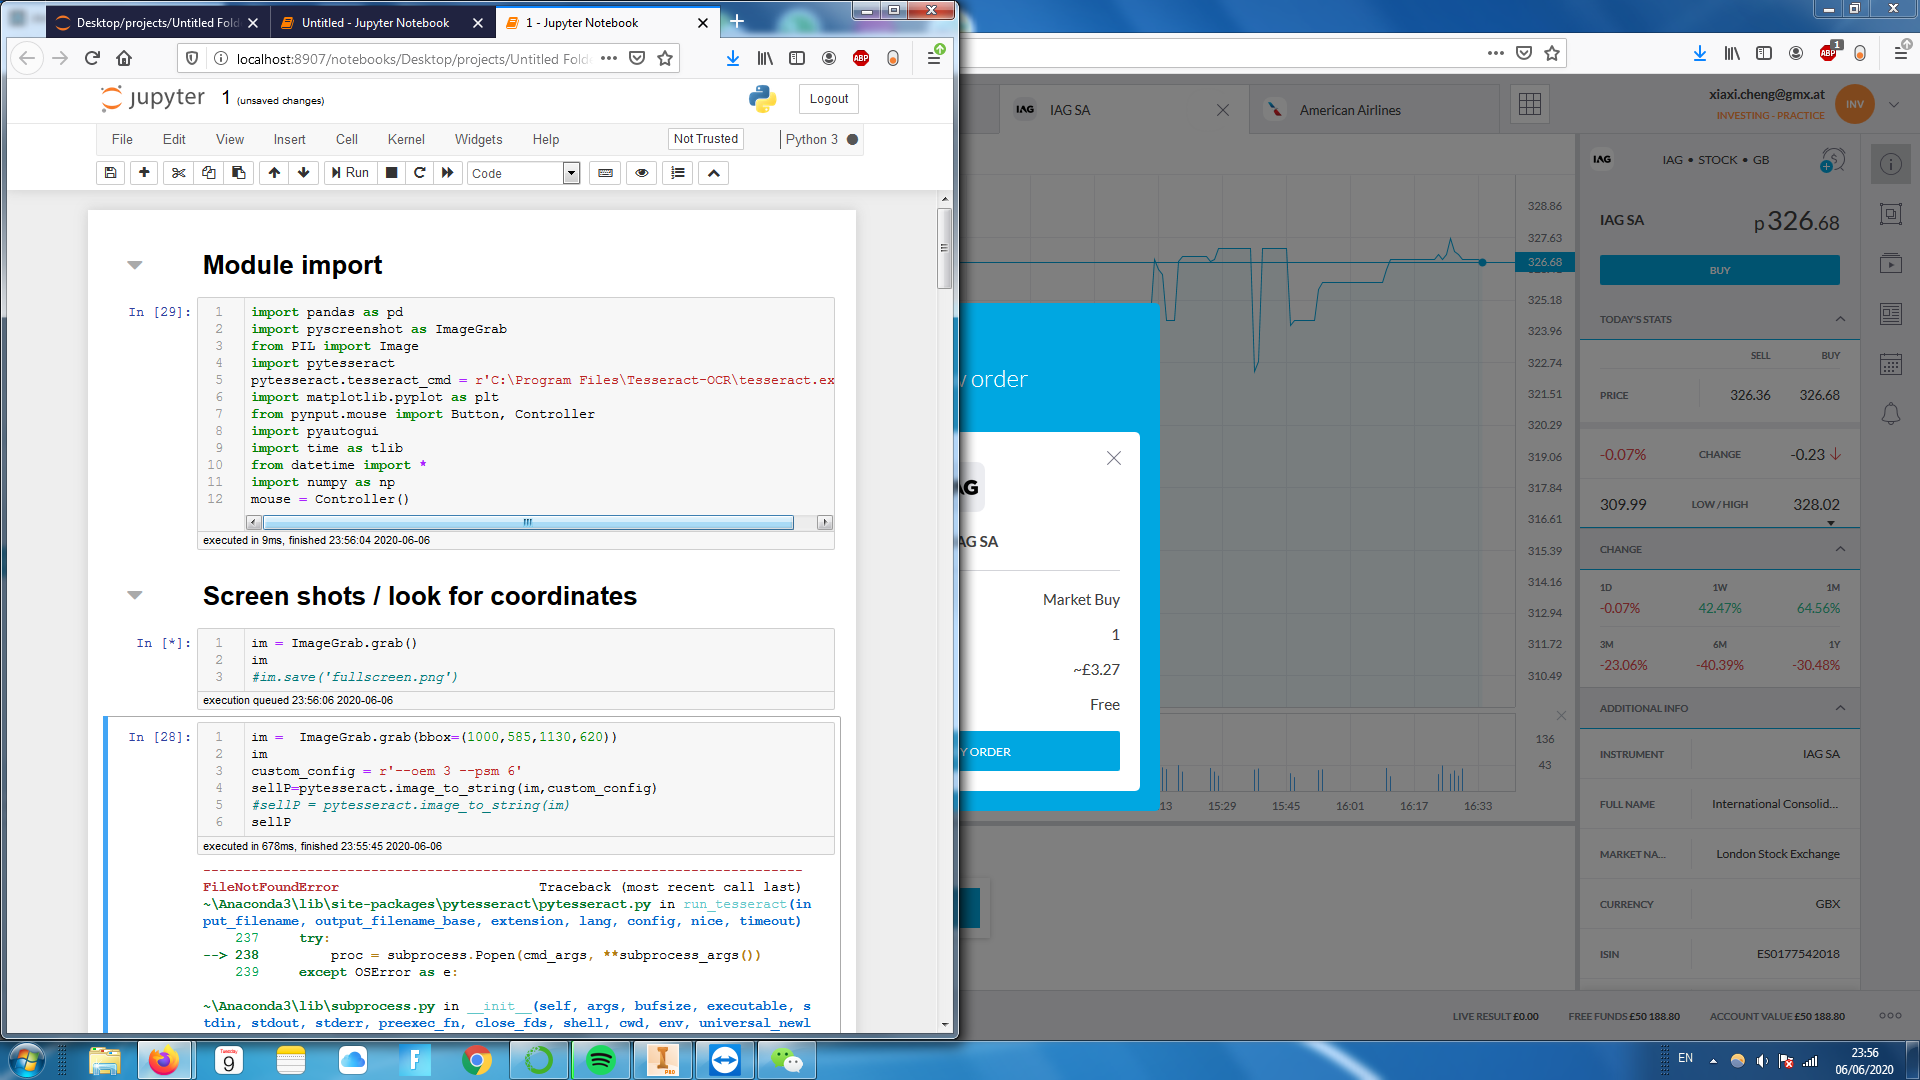

In [30]:
im = ImageGrab.grab()
im
#im.save('fullscreen.png')

In [39]:
im =  ImageGrab.grab(bbox=(1000,585,1130,620))
im
custom_config = r'--oem 3 --psm 6'
sellP=pytesseract.image_to_string(im,custom_config)
#sellP = pytesseract.image_to_string(im)
sellP

TesseractNotFoundError: tesseract is not installed or it's not in your PATH

In [40]:
sellbuyPrice=(1080,360,1205,400)
sellsubPrice = (1, 1,60,30)
buysubPrice = (80, 1,125,30)

im =  ImageGrab.grab(bbox=sellbuyPrice)
sellP = pytesseract.image_to_string(im.crop(box=buysubPrice))
#sellP = pytesseract.image_to_string(im)
print(float(sellP))
im
#im.crop(box=buysubPrice)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH

In [41]:
get2(sellbuyPrice,sellsubPrice,buysubPrice)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH

# Define position / test mouse and keyboard

These are for the square computer with 1280x1024

In [266]:
#avgPrice = (1780, 200,1850, 250)
#buyPrice = (1800, 380,1850,400)
#sellPrice = (1730, 380,1772,400)

sellbuyPrice=(1080,360,1205,400)
sellsubPrice = (1, 1,60,30)
buysubPrice = (80, 1,125,30)

exePrice = (640, 600,800,640)

sellBotton = (1020, 255)
buyBotton = (1150, 255)
keyboardBotton =(785, 500)
reviewBotton = (640, 750)
sendBotton = (640, 700)

emptyspaceBotton = (1250, 650)

tab1Bottom = (350,100)
tab2Bottom = (550, 100)

In [9]:
mouse = Controller()
mouse.position = emptyspaceBotton
tlib.sleep(0.3)
mouse.click(Button.left, 1)
tlib.sleep(0.2)
mouse.position = tab2Bottom

In [180]:

mouse.position = buyBotton
tlib.sleep(0.3)
pyautogui.press("Esc")
tlib.sleep(0.5)
pyautogui.press("Esc")

In [184]:
mouse.position = emptyspaceBotton
tlib.sleep(0.3)
mouse.click(Button.left, 1)
tlib.sleep(0.2)
mouse.click(Button.left, 1)
tlib.sleep(0.2)
mouse.position = buyBotton
tlib.sleep(0.3)
mouse.click(Button.left, 1)
tlib.sleep(0.2)
#pyautogui.press("Esc")

In [164]:
mouse.position = buyBotton
tlib.sleep(0.2)
mouse.click(Button.left, 1)
tlib.sleep(0.3)
mouse.position = keyboardBotton
tlib.sleep(0.3)
mouse.click(Button.left, 2)
tlib.sleep(0.3)
pyautogui.press("1")
tlib.sleep(0.3)
mouse.position = reviewBotton
tlib.sleep(0.3)
mouse.click(Button.left, 2)
tlib.sleep(0.3)
mouse.position = sendBotton
tlib.sleep(0.3)
mouse.click(Button.left, 2)

In [194]:
click(buyBotton)
tlib.sleep(0.2)
pyautogui.press("Esc")
tlib.sleep(0.2)
pyautogui.press("Esc")

# Final useful modules

In [34]:
def initial():
    mouse.position = emptyspaceBotton
    tlib.sleep(0.3)
    mouse.click(Button.left, 1)
    tlib.sleep(0.3)

def click(botton):
    mouse.position = botton
    tlib.sleep(0.2)
    mouse.click(Button.left, 1)
    tlib.sleep(0.2)
    mouse.click(Button.left, 1)
    tlib.sleep(0.2)
    
    
    
def typing(nr):
    strNr = str(nr)
    for i in strNr:
        pyautogui.press(i)
        tlib.sleep(0.15)

def get(price):
    im =  ImageGrab.grab(bbox=price)
    custom_config = r'--oem 3 --psm 6'
    res = float(pytesseract.image_to_string(im, config=custom_config)[2::])
    print(res)
    return res

def get2(pricebox, sellbox, buybox):
    im =  ImageGrab.grab(bbox=pricebox)
    sellP = im.crop(box=sellbox)
    buyP = im.crop(box=buybox)
    custom_config = r'--oem 3 --psm 6'
    sellP = float(pytesseract.image_to_string(sellP, config=custom_config))
    custom_config = r'--oem 3 --psm 6'
    buyP = float(pytesseract.image_to_string(buyP, config=custom_config))
    return [sellP, buyP]

In [408]:
def do(action, shareNr):
    if action == "buy":
        click(buyBotton)
    elif action == "sell":
        click(sellBotton)

    click(keyboardBotton)
    typing(shareNr)
    click(reviewBotton)
    try:
        get(exePrice)
        click(sendBotton)
        tlib.sleep(2)
        return True
    except:
        tlib.sleep(0.2)
        pyautogui.press("Esc")
        tlib.sleep(0.2)
        pyautogui.press("Esc")
        tlib.sleep(0.2)
        pyautogui.press("Esc")
        return False
    
    


# Algo 1

In [233]:
testDF = pd.DataFrame({}, columns=["Time","sell","buy"])
testDF.set_index(["Time"], inplace=True, drop=True)

In [239]:
'''buylist=[]
buyindlist=[]
buytimelist=[]
selllist=[]
sellindlist=[]
selltimelist=[]
'''

minProfit = 0.1
maxbuyPratio=1.02
qty = 60
stoptime = datetime(2020, 6, 2, 15, 0, 0,0)

while datetime.now()<datetime(2020, 6, 2, 21, 30, 0,0):
    # here i try to read the prices
    try:
        pricelist = get2(sellbuyPrice,sellsubPrice,buysubPrice)
        if (pricelist[0]>1000) or (pricelist[1]>1000):
            pass
        else:
        # In case the readout is wrong.
        #if (pricelistraw[0]<110)&(pricelistraw[1]<110):
        #    pricelist=pricelistraw
        #else:
        #    pricelist=[np.nan, np.nan]
        
        # append new line of data
            new_row = pd.DataFrame({"sell": pricelist[0],
                                    "buy": pricelist[1]
                                   }, index =[datetime.now()])
            testDF=pd.concat([testDF, new_row], ignore_index=False)
        
            currentP = testDF.iloc[-1]
        # define analysis dataframe
            testAvgDF = testDF.resample('1T').mean()
            testAvgDF.reset_index(inplace=True)
    
            if len(testAvgDF)>5:
                val = testAvgDF.iloc[-1]
                prev = testAvgDF.iloc[-2]
                pprev = testAvgDF.iloc[-3]
                ppprev = testAvgDF.iloc[-4]
                meanP = np.mean(testAvgDF.iloc[-4:].buy)
            #stdP = np.std(testAvgDF.iloc[-4:].buy)
            
                meanoverall = np.mean(testAvgDF.buy)
            #p2p = abs(np.max(testAvgDF.buy)-np.min(testAvgDF.buy))
            
            # first buying
                if (len(buylist)==0):
                # buying: 2 down 1 up
                    if  (currentP.buy < val.buy)& \
                        (val.buy < meanP)& \
                        (val.buy > prev.buy)& \
                        (prev.buy < pprev.buy)& \
                        (pprev.buy < ppprev.buy)& \
                        (len(buylist) == len(selllist)):
                    #####################################
                        status = do("buy",qty)
                        if status == True:
                            buylist.append(currentP.buy)
                            buyindlist.append(len(testDF)-1)
                            buytimelist.append(datetime.now())
                            print("Bought@"+str(currentP.buy))
                        else:
                            print("Error at Buying")
                    #####################################
                else:
                    if len(selllist)>0:
                        # buying: 2 down 1 up
                        if  (len(buylist)==len(selllist))& \
                            (val.buy < selllist[-1])& \
                            (currentP.buy < val.buy)& \
                            (val.buy < meanP)& \
                            (val.buy > prev.buy)& \
                            (prev.buy < pprev.buy)& \
                            (pprev.buy < ppprev.buy):
                        #(datetime.now()<stoptime):
                        #####################################
                            status = do("buy",qty)
                            if status == True:
                                buylist.append(currentP.buy)
                                buyindlist.append(len(testDF)-1)
                                buytimelist.append(datetime.now())
                                print("Bought@"+str(currentP.buy))
                            else:
                                print("Error at Buying")
                        #####################################
                        
                    # selling: up/equal 1 down 1     
                        elif    (len(buylist) > len(selllist))& \
                                (currentP.sell > val.sell)& \
                                (val.sell < prev.sell)& \
                                (prev.sell >= pprev.sell)& \
                                (val.sell > buylist[-1]+minProfit):
                            #####################################
                                status=do("sell",qty)
                                if status == True:
                                    selllist.append(currentP.sell)
                                    sellindlist.append(len(testDF)-1)
                                    timelist.append(datetime.now())
                                    print("Sold@"+str(currentP.sell))
                                else:
                                    print("Error at Selling")
                            #####################################
                            
                # selling: up/equal 1 down 1            
                    elif    (val.sell > buylist[-1]+minProfit)& \
                            (currentP.sell > val.sell)& \
                            (val.sell < prev.sell)& \
                            (prev.sell >= pprev.sell)& \
                            (len(buylist) > len(selllist)):
                        #####################################
                            status=do("sell",qty)
                            if status == True:
                                selllist.append(currentP.sell)
                                sellindlist.append(len(testDF)-1)
                                timelist.append(datetime.now())
                                print("Sold@"+str(currentP.sell))
                            else:
                                print("Error at Selling")
                        #####################################
                    else:
                        pass 
    except:
        print("Couldnt read it")
        tlib.sleep(1)
        pass


Bought@248.7
Couldnt read it
Couldnt read it


KeyboardInterrupt: 

In [65]:
#testDF.to_csv("iag_mon.csv")

In [186]:
testDF = pd.DataFrame({}, columns=["Time","sell","buy"])
testDF.set_index(["Time"], inplace=True, drop=True)

In [542]:
def updateDF(baseDF, newElement):
    new_row = pd.DataFrame({"sell": newElement[0],
                            "buy": newElement[1]
                            }, index =[datetime.now()])
    baseDF=pd.concat([baseDF, new_row], ignore_index=False)
    return baseDF

def mkavgDF(baseDF):
    testAvgDF = baseDF.resample('1T').mean()
    testAvgDF.reset_index(inplace=True)
    return testAvgDF

def getoverallMean(avgDF,suggMean):
    temp =avgDF[avgDF["buy"]<(suggMean*2)].buy.mean()
    return temp

def buyCond(dataList, meanoverall, maxbuyPratio):
    res = (dataList[0].buy < dataList[1].buy)& (dataList[1].buy > dataList[2].buy)& (dataList[2].buy < dataList[3].buy)& (dataList[3].buy < dataList[4].buy)& (dataList[1].buy < meanoverall*maxbuyPratio)
    return res

def sellCond(dataList,buylist, minProfit):
    res = (dataList[1].sell > buylist[-1]+minProfit)& (dataList[1].sell < dataList[2].sell)& (dataList[2].sell >= dataList[3].sell)&(dataList[0].sell > buylist[-1]+minProfit)
    return res


def execute(sellbuyPrice,sellsubPrice,buysubPrice,
            testDF,#base data frame
            uplimit,#reading limit
            suggMean,#suggested mean of the shares
            maxbuyPratio, # maximal ratio for buying over overallmean
            minProfit,
            buylist,selllist,
            qty,buyindlist, sellindlist, stoptime):
    try:
        pricelist = get2(sellbuyPrice,sellsubPrice,buysubPrice)
        if (pricelist[0]>uplimit) | (pricelist[1]>uplimit):
            print("Image scrapping wrong")
            pass
        else:
            testDF = updateDF(testDF,pricelist)
            currentP = testDF.iloc[-1]
            # define analysis dataframe
            testAvgDF = mkavgDF(testDF)
            ##############################################
            # start buying after 20 min.
            if len(testAvgDF)>6:
                analList = [currentP, testAvgDF.iloc[-2], testAvgDF.iloc[-3], testAvgDF.iloc[-4],testAvgDF.iloc[-5]]
                meanoverall = getoverallMean(testAvgDF, suggMean)

            # first buying
                if (len(buylist)==0):
                # buying: 2 down 1 up
                    if  buyCond(analList, meanoverall, maxbuyPratio) & \
                        (datetime.now()<stoptime):
                    #####################################
                        status = do("buy",qty)
                        if status == True:
                            buylist.append(currentP.buy)
                            buyindlist.append(len(testDF)-1)
                            print("Bought@"+str(currentP.buy))
                        else:
                            print("Error at Buying")
                    #####################################
                elif (len(buylist) > 0):
                    if (len(buylist) == len(selllist)):
                        # buying: 2 down 1 up
                        if  buyCond(analList, meanoverall, maxbuyPratio)& \
                            (datetime.now()<stoptime):
                        #####################################
                            status = do("buy",qty)
                            if status == True:
                                buylist.append(currentP.buy)
                                buyindlist.append(len(testDF)-1)
                                print("Bought@"+str(currentP.buy))
                            else:
                                print("Error at Buying")
                        #####################################
                        else:
                            pass
                    # selling: up/equal 1 down 1     
                    elif (len(buylist) > len(selllist)):
                        if sellCond(analList,buylist, minProfit):
                            #####################################
                                status=do("sell",qty)
                                if status == True:
                                    selllist.append(currentP.sell)
                                    sellindlist.append(len(testDF)-1)
                                    print("Sold@"+str(currentP.sell))
                                else:
                                    print("Error at Selling")
                            ##################################### 
            else:
                pass
    except:
        print("Couldnt read it!")
        tlib.sleep(1)
        pass
    
    return testDF, buylist, selllist, buyindlist, sellindlist



## 2 shares at the same time

In [549]:
testDF1 = pd.DataFrame({}, columns=["Time","sell","buy"])
testDF1.set_index(["Time"], inplace=True, drop=True)

testDF2 = pd.DataFrame({}, columns=["Time","sell","buy"])
testDF2.set_index(["Time"], inplace=True, drop=True)

In [550]:
buylist1=[]
buyindlist1=[]
buylist2=[]
buyindlist2=[]

selllist1=[]
sellindlist1=[]
selllist2=[]
sellindlist2=[]

In [ ]:
uplimit1 = 100
suggMean1 = 58
minProfit1 = 0.05
qty1 = 14
uplimit2 = 400
suggMean2 = 288
minProfit2 = 0.3
qty2 = 330

maxbuyPratio=1.02
stoptime = datetime(2020, 6, 5, 15, 0, 0,0)

while datetime.now()<datetime(2020, 6, 5, 16, 30, 0,0):
    click(emptyspaceBotton)
    click(tab1Bottom)
    testDF1, buylist1, selllist1, buyindlist1, sellindlist1 = execute(   sellbuyPrice,sellsubPrice,buysubPrice,
                                                                    testDF1,#base data frame
                                                                    uplimit1,#reading limit
                                                                    suggMean1,#suggested mean of the shares
                                                                    maxbuyPratio, # maximal ratio for buying over overallmean
                                                                    minProfit1,
                                                                    buylist1,selllist1, qty1,buyindlist1, sellindlist1,stoptime)
    
    click(emptyspaceBotton)
    click(tab2Bottom)
    testDF2, buylist2, selllist2, buyindlist2, sellindlist2 = execute(   sellbuyPrice,sellsubPrice,buysubPrice,
                                                                    testDF2,#base data frame
                                                                    uplimit2,#reading limit
                                                                    suggMean2,#suggested mean of the shares
                                                                    maxbuyPratio, # maximal ratio for buying over overallmean
                                                                    minProfit2,
                                                                    buylist2,selllist2, qty2,buyindlist2, sellindlist2,stoptime)
                        

In [556]:
selllist1

[]

# Data Analysis

In [511]:
testDF1.to_csv("aal0406.csv")

In [512]:
testDF2.to_csv("del0406.csv")

In [513]:
pd.DataFrame({"BuyPrice":buylist1, "SellPrice": selllist1}).to_csv("delpositions0406.csv")
pd.DataFrame({"BuyPrice":buyindlist1, "SellPrice": sellindlist1}).to_csv("delpositionsindex0406.csv")
#pd.DataFrame({"BuyPrice":buylist2, "SellPrice": selllist2}).to_csv("iagpositions0406.csv")
#pd.DataFrame({"BuyPrice":buyindlist2, "SellPrice": sellindlist2}).to_csv("iagpositionsindex0406.csv")

ValueError: arrays must all be same length

In [522]:
testDF1 = pd.read_csv("bmw0406.csv")
testDF2 = pd.read_csv("iag0406.csv")

In [533]:
buyindlist1 =pd.read_csv("bmwpositions0406.csv")
#buyindlist2 =pd.read_csv("iagpositionsindex0406.csv")

In [534]:
buyindlist1

,Unnamed: 0,BuyPrice,SellPrice
0,0,56.85,56.92
1,1,56.82,57.07
2,2,57.78,57.89


Airbus intotal i made with 2500 pounds

In [428]:
40*np.sum(np.array(selllist1)-np.array(buylist1))

44.400000000000546

with 200 pounds on IAG SA

In [432]:
np.sum(np.array(selllist2)-np.array(buylist2))

14.940000000000055

This is around 2 percent profit

In [434]:
60/2800

0.02142857142857143

In [524]:
testDF1["Spread"]= (testDF1["buy"]-testDF1["sell"])*2/(testDF1["buy"]+testDF1["sell"])

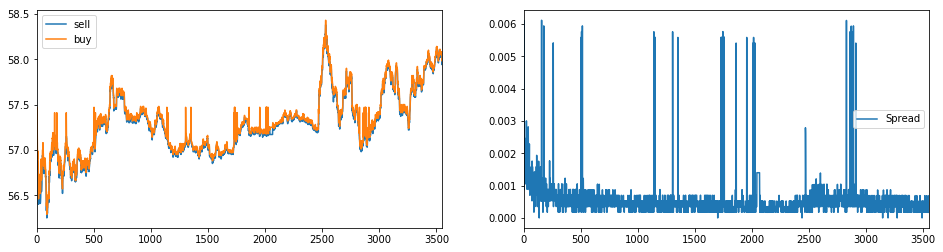

In [525]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
testDF1.plot(y=["sell","buy"], ax=ax[0])
testDF1.plot(y=["Spread"], ax=ax[1])

In [447]:
avgtestDF1=testDF1.resample("T").mean()

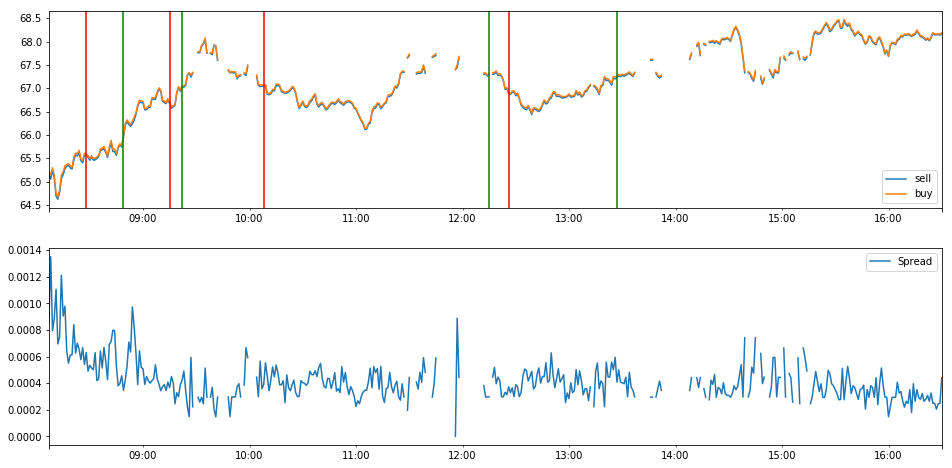

In [471]:
fig, ax = plt.subplots(nrows=2,figsize=(16,8))
avgtestDF1.plot(y=["sell","buy"], ax=ax[0])
avgtestDF1.plot(y=["Spread"], ax=ax[1])
for i in buyindlist1:
    label = testDF1.iloc[i].name
    ax[0].axvline(x=label,c="red")
for i in sellindlist1:
    label = testDF1.iloc[i].name
    ax[0].axvline(x=label,c="g")

In [536]:
testDF2["Spread"]= (testDF2["buy"]-testDF2["sell"])*2/(testDF2["buy"]+testDF2["sell"])

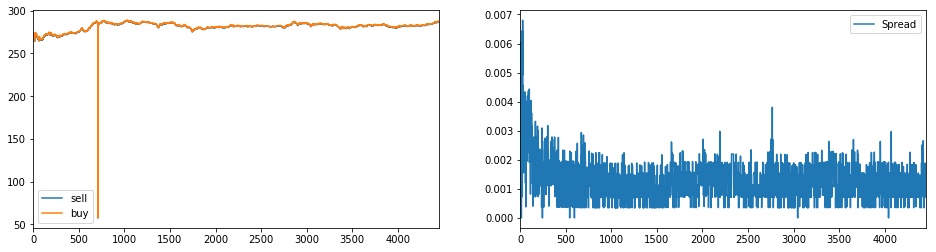

In [537]:
fig, ax = plt.subplots(ncols=2,figsize=(16,4))
testDF2.plot(y=["sell","buy"], ax=ax[0])
testDF2.plot(y=["Spread"], ax=ax[1])

(250, 300)

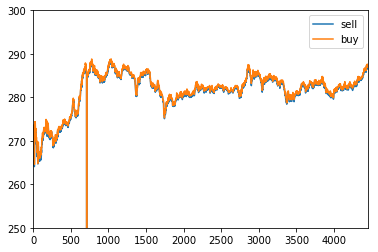

In [541]:
testDF2.plot(y=["sell","buy"])
plt.ylim([250,300])

In [538]:
avgtestDF2=testDF2.resample("T").mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

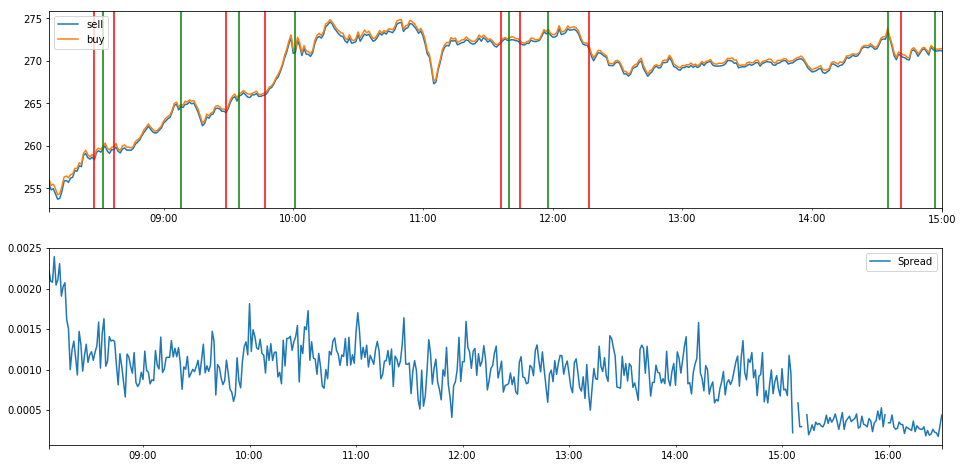

In [476]:
fig, ax = plt.subplots(nrows=2,figsize=(16,8))
avgtestDF2[:"2020-06-03 15:00:00"].plot(y=["sell","buy"], ax=ax[0])
avgtestDF2.plot(y=["Spread"], ax=ax[1])
for i in buyindlist2:
    label = testDF2.iloc[i].name
    ax[0].axvline(x=label,c="red")
for i in sellindlist2:
    label = testDF2.iloc[i].name
    ax[0].axvline(x=label,c="g")